In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [50]:
product_grouped = df.groupby('Description')
product_total = product_grouped['Quantity'].sum()
product_total = product_total.sort_values(ascending=False)
product_total.head(n=10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     108545
WHITE HANGING HEART T-LIGHT HOLDER     93050
ASSORTED COLOUR BIRD ORNAMENT          81306
JUMBO BAG RED RETROSPOT                78090
BROCADE RING PURSE                     70700
PACK OF 60 PINK PAISLEY CAKE CASES     56575
60 TEATIME FAIRY CAKE CASES            54366
SMALL POPCORN HOLDER                   49616
PACK OF 72 RETROSPOT CAKE CASES        49344
PACK OF 72 RETRO SPOT CAKE CASES       46106
Name: Quantity, dtype: int64

In [25]:
type(df['InvoiceDate'][0])

str

In [30]:
df['InvoiceDate'][0]

Timestamp('2009-12-01 07:45:00')

In [31]:
df['InvoiceDate'][len(df['InvoiceDate'])-1]

Timestamp('2011-12-09 12:50:00')

In [33]:
df['InvoiceDate'].value_counts()

InvoiceDate
2010-12-06 16:57:00    1350
2010-12-09 14:09:00    1304
2010-12-07 15:28:00    1202
2010-12-06 09:58:00    1194
2010-12-03 11:36:00    1186
                       ... 
2010-09-28 11:28:00       1
2011-09-23 08:22:00       1
2011-09-23 08:24:00       1
2011-09-23 08:25:00       1
2011-01-20 16:15:00       1
Name: count, Length: 47635, dtype: int64

In [29]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Date"] = df["InvoiceDate"].dt.date

ventas_por_dia = df.groupby(["Date", "Description"])["Quantity"].sum().reset_index()

top_5_por_dia = ventas_por_dia.sort_values(["Date", "Quantity"], ascending=[True, False])
top_5_por_dia = top_5_por_dia.groupby("Date").head(5)

top_5_por_dia

,Date,Description,Quantity
87,2009-12-01,ASSORTED COLOUR BIRD ORNAMENT,1272
200,2009-12-01,BOYS ALPHABET IRON ON PATCHES,577
743,2009-12-01,PAPER CHAIN KIT 50'S CHRISTMAS,424
84,2009-12-01,ASS COL SMALL SAND FROG P'WEIGHT,326
731,2009-12-01,PACK OF 72 RETRO SPOT CAKE CASES,312
...,...,...,...
539222,2011-12-09,SMALL FOLDING SCISSOR(POINTED EDGE),240
539007,2011-12-09,POPCORN HOLDER,230
538723,2011-12-09,GROW A FLYTRAP OR SUNFLOWER IN TIN,195
539219,2011-12-09,SMALL CERAMIC TOP STORAGE JAR,192


In [35]:
df["precio_total"] = df["Quantity"] * df["Price"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,precio_total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,14.85


In [41]:
ventas_diarias = df.groupby("Date")["precio_total"].sum().reset_index()
ventas_diarias

,Date,precio_total
0,2009-12-01,53173.03
1,2009-12-02,62763.59
2,2009-12-03,68093.05
3,2009-12-04,40346.40
4,2009-12-05,9803.05
...,...,...
599,2011-12-05,57751.32
600,2011-12-06,54228.37
601,2011-12-07,75076.22
602,2011-12-08,81417.78


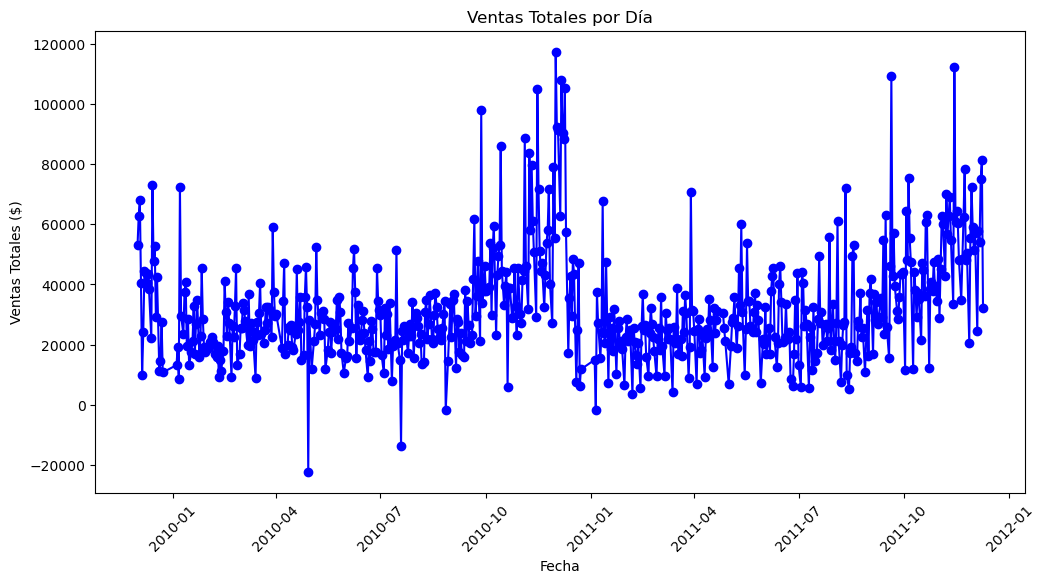

In [44]:
ventas_por_dia = df.groupby("Date")["precio_total"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ventas_por_dia["Date"], ventas_por_dia["precio_total"], marker="o", linestyle="-", color="b")

plt.xlabel("Fecha")
plt.ylabel("Ventas Totales ($)")
plt.title("Ventas Totales por Día")
plt.xticks(rotation=45)

plt.show()

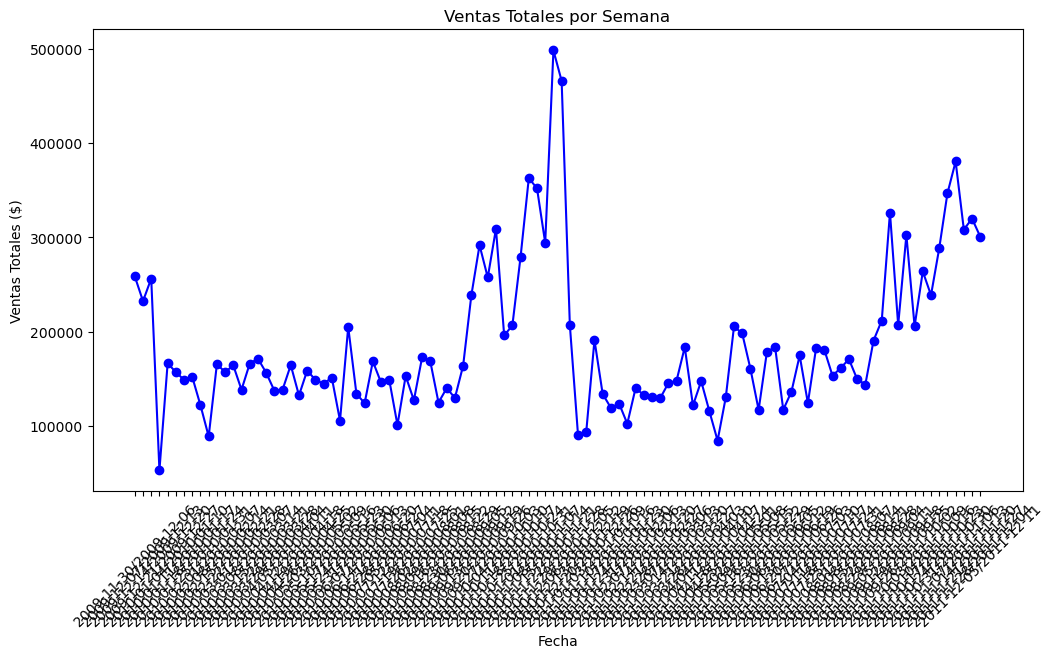

In [47]:
df["Week"] = df["InvoiceDate"].dt.to_period("W").astype(str)
ventas_semana = df.groupby("Week")["precio_total"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ventas_semana["Week"], ventas_semana["precio_total"], marker="o", linestyle="-", color="b")

plt.xlabel("Fecha")
plt.ylabel("Ventas Totales ($)")
plt.title("Ventas Totales por Semana")
plt.xticks(rotation=45)

plt.show()

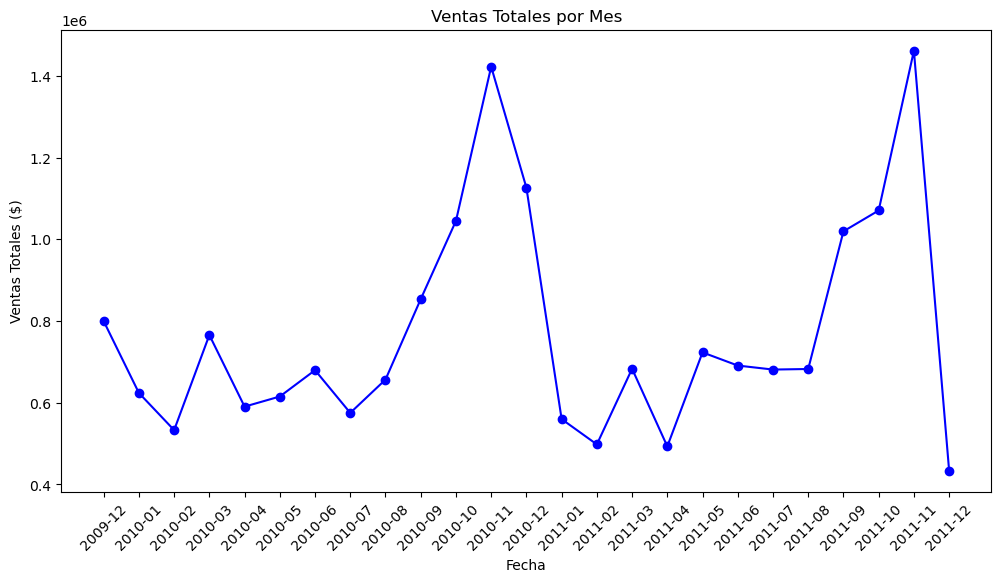

In [48]:
df["Month"] = df["InvoiceDate"].dt.to_period("M").astype(str)
ventas_mes = df.groupby("Month")["precio_total"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ventas_mes["Month"], ventas_mes["precio_total"], marker="o", linestyle="-", color="b")

plt.xlabel("Fecha")
plt.ylabel("Ventas Totales ($)")
plt.title("Ventas Totales por Mes")
plt.xticks(rotation=45)

plt.show()

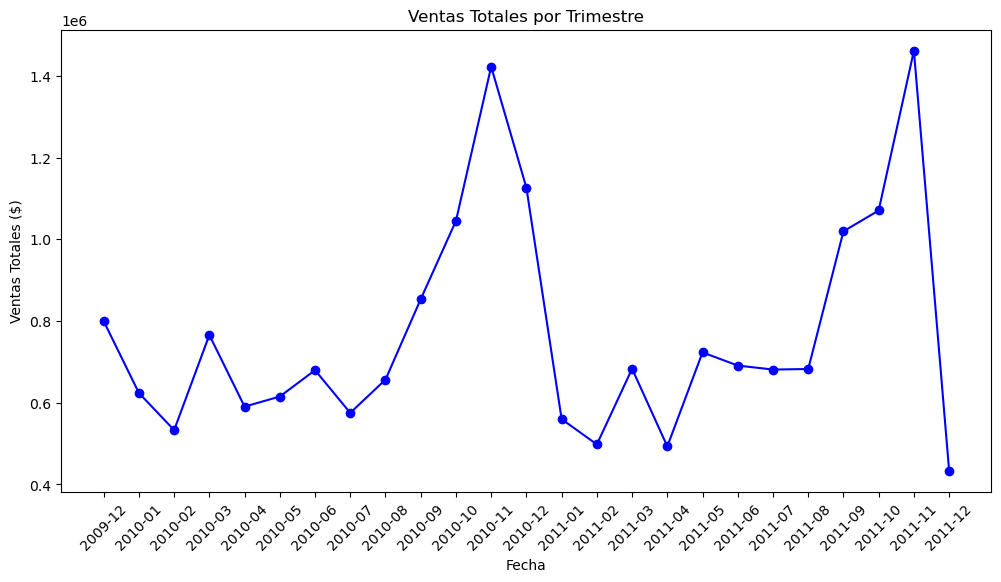

In [49]:
df["TriMonth"] = df["InvoiceDate"].dt.to_period("3M").astype(str)
ventas_trimestre = df.groupby("TriMonth")["precio_total"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ventas_trimestre["TriMonth"], ventas_trimestre["precio_total"], marker="o", linestyle="-", color="b")

plt.xlabel("Fecha")
plt.ylabel("Ventas Totales ($)")
plt.title("Ventas Totales por Trimestre")
plt.xticks(rotation=45)

plt.show()